In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser as dparser

### List of PAGASA synoptic stations

In [2]:
synop_stations = pd.read_excel('pagasa_stations.xlsx')

In [3]:
synop_stations.head()

,Unnamed: 0,Station Name,Station type,Unnamed: 3,Unnamed: 4,Region
0,1,"Kabankalan, Negros",ARG,9.992039,122.814739,6
1,2,"Tavora East, Pugo, La Union",ARG,16.319442,120.463110,1
2,3,"Magdum, Tagum, Davao del Norte",ARG,7.469917,125.832611,11
3,4,"Talakag, Bukidnon",ARG,8.245500,124.598917,10
4,5,La Granja AWS,AWS,10.407472,122.982694,6


### Read synoptic data

In [4]:
temp = pd.read_excel('../synop/DRY_BULB_2016-17.xls')

# Test out temperature measurements

In [5]:
#preview of temperature dataset
temp.head()

,Date(UTC),"Alabat, Quezon Temp.Dry [degC]","Ambulong, Batangas Temp.Dry [degC]","Aparri, Cagayan Temp.Dry [degC]","Baguio City, Benguet Temp.Dry [degC]","Baler (Radar), Aurora Temp.Dry [degC]","Basco (Radar), Batanes Temp.Dry [degC]","Borongan, Eastern Samar Temp.Dry [degC]","Butuan City, Agusan Del Norte Temp.Dry [degC]","Cabanatuan, Nueva Ecija Temp.Dry [degC]",...,"Sangley Point, Cavite Temp.Dry [degC]","Science Garden Quezon City, Metro Manila Temp.Dry [degC]","Sinait, Ilocos Sur Temp.Dry [degC]","Surigao City, Surigao Del Norte Temp.Dry [degC]","Tacloban City, Leyte Temp.Dry [degC]","Tanay, Rizal (Radar) Temp.Dry [degC]","Tayabas City, Quezon Temp.Dry [degC]","Tuguegarao City, Cagayan Temp.Dry [degC]","Virac (Synop), Catanduanes Temp.Dry [degC]","Zamboanga City, Zamboanga Del Sur Temp.Dry [degC]"
0,Source,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,...,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation,Climatic observation
1,2016-01-01 18:00:00,26.4,24.8,25,17,23,24,26.4,24.7,23.3,...,25.7,24.3,NaN,26.6,NaN,21.4,24,23.3,25.6,26.4
2,2016-01-01 21:00:00,26.2,24.6,NaN,16.6,23.2,24.1,25.8,24.6,23.8,...,26,23.4,NaN,25.7,NaN,21,23.8,23.1,25.8,25.6
3,2016-01-02 00:00:00,27.6,26.2,24.4,18,24.2,24.5,27.8,25.9,25.8,...,26.1,23.8,NaN,28.4,NaN,21,25.4,23,26.6,27.7
4,2016-01-02 03:00:00,28.8,30.2,25.4,21.8,24.2,24.1,28,30.6,30,...,29,30.4,NaN,30.7,NaN,24.3,28,24.4,29,32


In [6]:
#remove first row
temp = temp.drop(index=0)

# Initial assessments of the dataset

Temperature measurements are done in 56 synoptic stations every 3 hours from January 1, 2016 18:00 to December 31, 2017 15:00. A total of 5840 measurements are done per station. The temperature is in degrees Celsius. Some data are missing, inidcated as "NaN" in the file. We don't include these measurements in our analysis.

In [7]:
#get measured temperature values
measured_temp = temp.values[:,1:]

## Get temperature distribution of whole dataset (excluding missing data)

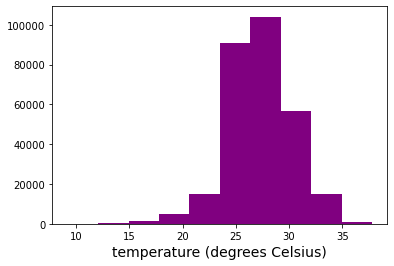

In [8]:
plt.hist(measured_temp[~np.isnan(measured_temp.astype(np.float))],color='purple')
plt.xlabel('temperature (degrees Celsius)',fontsize=14)
plt.show()

Most temperature measurements fall within the 25-30 degrees Celsius range. However, we have some extremes: temperatures above 35 degrees Celsius, and temperatures below 15 degrees Celsius. So our next questions are when and where these extreme temperatures occur. The following visualization plots attempt to answer these questions. 

## Compare temperature distribution for each station using boxplots

In [9]:
#exclude missing data
mask = ~np.isnan(measured_temp.astype(np.float))
filtered_data = [d[m] for d, m in zip(measured_temp.T, mask.T)]

#get name of stations
stations = temp.columns.tolist()[1:]

In [10]:
#get shorter location names of stations
station_names = []

for s in stations:
    station_names.append(s.split(',')[0])

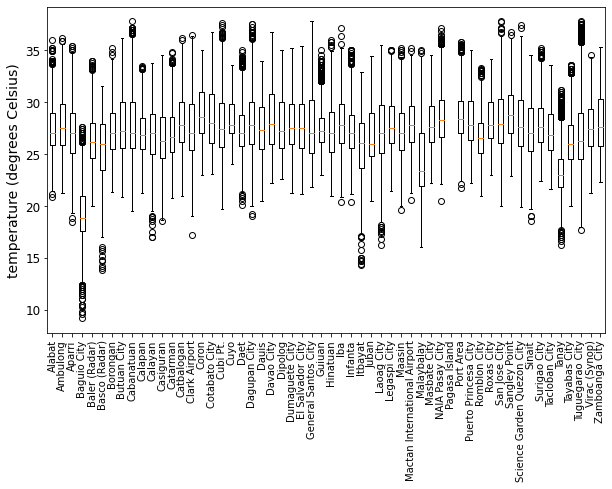

In [11]:
plt.figure(figsize=(10,6))
plt.boxplot(filtered_data)
plt.yticks(fontsize=12)
plt.ylabel('temperature (degrees Celsius)',fontsize=14)
plt.xticks(range(1,57),station_names,fontsize=10,rotation=90)
plt.show()

The median temperature measurements in the different synoptic stations reflect some of our observations from the histogram. Almost all stations' median temperatures are around the 25-30 degrees Celsius range. From the box plots, we can answer our question of where the extreme temperatures occur. 

We have a few stations deviating below the 25-30 degrees Celsius range: Baguio City, Malaybalay, and Tanay. Baguio City, expectedly, has the lowest median temperature. It's outliers show that temperatures in Baguio City dropped below 10 degrees Celsius between 2016 and 2017. 

From the outliers of the other stations, we can also determine which stations reached temperatures beyond 35 degrees Celsius. Some of these stations include Cabanatuan, Cubi Pt., Dagupan City, NAIA Pasay City, Science Garden QC, and Tuguegarao City. The first three stations are within Central Luzon, while the next two are in Metro Manila. 

Note that Pagasa Island, Palawan has no box plot since the temperature measurements from this station are missing in the dataset. 

## Get time series of overall 3-hourly median temperature from 2016-2017

In [12]:
temp_med = []
times = []

#calculte the overall median for each time
for t in range(0,22,3):
    time = str(t)+':00:00'
    index = temp['Date(UTC)'].str.contains(time)
    temp_med.append(np.nanmedian(temp[index].values[:,1:].astype(np.float)))
    times.append(time[:-3])

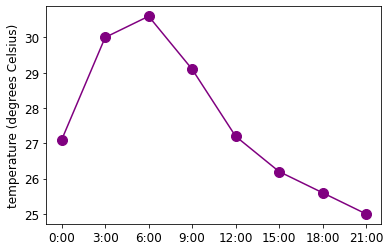

In [13]:
plt.plot(times,temp_med,marker='o',markersize=10,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('temperature (degrees Celsius)',fontsize=12)
plt.show()

From this time series plot of the 3-hourly median temperature, we see that temperature peaks at around 6AM then gradually decreases into the afternoons and evenings. 

## Get time series of overall daily median, maximum, and minimum temperature in a year

In [14]:
# get array of dates starting from Jan 1 2016 to Dec 31 2016
dates = pd.Series(pd.date_range(start='01/01/2016',end='12/31/2016').format())

In [15]:
temp_daily_med = []
max_temp = []
min_temp = []
days = []

#calculate the overall median for each day
for d in dates:
    day = d[5:]
    index = temp['Date(UTC)'].str.contains(day)
    temp_vals = temp[index].values[:,1:].astype(np.float)
    
    #get daily median temp
    temp_daily_med.append(np.nanmedian(temp_vals))
    
    #get daily max temp
    max_temp.append(np.nanmax(temp_vals))
    
    #get daily min temp
    min_temp.append(np.nanmin(temp_vals))
    
    days.append(day)

#get rolling median temperature every 10 days
temp_daily_med = pd.Series(temp_daily_med)
rolling_med = temp_daily_med.rolling(10).median()

#get rolling max temperature every 10 days
max_temp = pd.Series(max_temp)
rolling_max = max_temp.rolling(10).median()

#get rolling min temperature every 10 days
min_temp = pd.Series(min_temp)
rolling_min = min_temp.rolling(10).median()

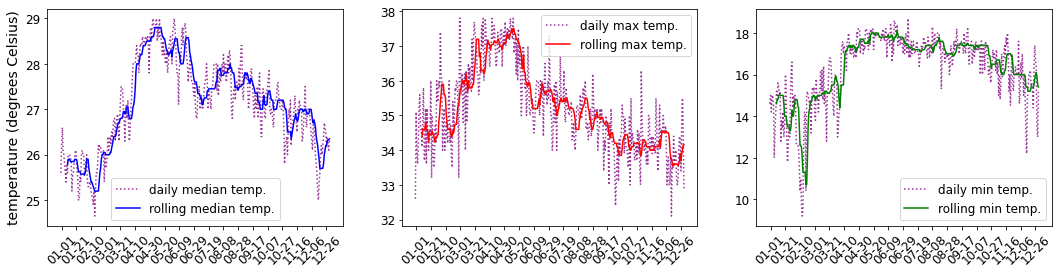

In [16]:
plt.figure(figsize=(18,4))

#plot median temp
plt.subplot(131)
plt.plot(days,temp_daily_med,color='purple',linestyle='dotted',alpha=0.8,label='daily median temp.')
plt.plot(days,rolling_med,color='blue',label='rolling median temp.')
plt.xticks(np.arange(1,367,20),days[::20],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('temperature (degrees Celsius)',fontsize=14)
plt.legend(loc='best',fontsize=12)

#plot max temp
plt.subplot(132)
plt.plot(days,max_temp,color='purple',linestyle='dotted',alpha=0.8,label='daily max temp.')
plt.plot(days,rolling_max,color='red',label='rolling max temp.')
plt.xticks(np.arange(1,367,20),days[::20],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)

#plot min temp
plt.subplot(133)
plt.plot(days,min_temp,color='purple',linestyle='dotted',alpha=0.8,label='daily min temp.')
plt.plot(days,rolling_min,color='green',label='rolling min temp.')
plt.xticks(np.arange(1,367,20),days[::20],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)

plt.show()

I included the rolling temperature to smoothen out the plot, while maintaining the underlying trend. From here, we see that the overall median temperature has two peaks: the higher one during April-May, and the lower one during August. The lowest temperature occurs around February, then rapidly increases towards April. The plots of the maximum and minimum temperature also reflect these observations. 

Missing sections of the rolling median plot indicates missing data (or NaN in the dataset). 

Using the box plot comparing all synoptic stations, and the time series of daily temperatures, we have answered our questions of when and where the temperature extremes typically occur. 

# Climatology of Laoag City, Ilocos Norte

In [17]:
pressure = pd.read_excel('../synop/MSL_pres_2016-17.xls')
rel_hum = pd.read_excel('../synop/RH_2016-17.xls')
precip = pd.read_excel('../synop/RR_2016-17.xls')
wind_dir = pd.read_excel('../synop/wind_dir_2016-17.xls')
wind_spd = pd.read_excel('../synop/wind_sped_2016-17.xls')

### Get monthly synoptic measurements

In [18]:
monthly_temp_med = []
monthly_precip_sum = []
monthly_rh_med = []

for i in range(1,13):
    if i < 10:
        month = '-0'+str(i)+'-'
    else:
        month = '-'+str(i)+'-'
    
    #get all measurements from all stations per month
    temp_index = temp['Date(UTC)'].str.contains(month)
    precip_index = precip['Date(UTC)'].str.contains(month)
    rh_index = rel_hum['Date(UTC)'].str.contains(month)
    
    #get measurements only from Laoag City
    temp_vals = temp[temp_index].filter(like='Laoag City',axis=1)
    precip_vals = precip[precip_index].filter(like='Laoag City',axis=1)
    rh_vals = rel_hum[rh_index].filter(like='Laoag City',axis=1)
    
    #calculate median or sum
    monthly_temp_med.append(temp_vals.median()[0])
    monthly_precip_sum.append(precip_vals.sum()[0])
    monthly_rh_med.append(rh_vals.median()[0])

## Monthly median temperature and accumulated rainfall

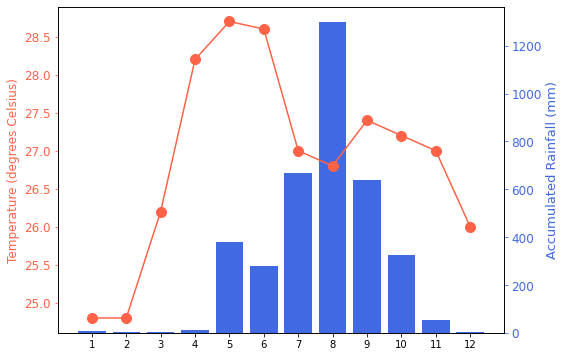

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

ax.plot(np.arange(1,13),monthly_temp_med,color='tomato',marker='o',markersize=10,zorder=2)
ax2.bar(np.arange(1,13),monthly_precip_sum,color='royalblue',zorder=1)
ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

ax.set_ylabel('Temperature (degrees Celsius)',fontsize=12,color='tomato')
ax2.set_ylabel('Accumulated Rainfall (mm)',fontsize=13,color='royalblue')

ax.tick_params(axis='y', colors='tomato',labelsize=12)
ax2.tick_params(axis='y', colors='royalblue',labelsize=12)

plt.xticks(np.arange(1,13),np.arange(1,13))
plt.show()

From here, we see that the temperature in Laoag City has two distinct peaks: during May and during September. The dip between these two peaks occurs during August, which coincides with Laoag City's highest accumulated rainfall. Since Laoag City is in northeastern Philippines, its months with heavy rainfall expectedly coincide with Habagat season. Laoag City is also colder during its dry season from November to April. Laoag City has the same Coronas climate classification as Metro Manila, so the separation between its wet and dry seasons are quite familiar to us. 

## Monthly median relative humidity and accumulated rainfall

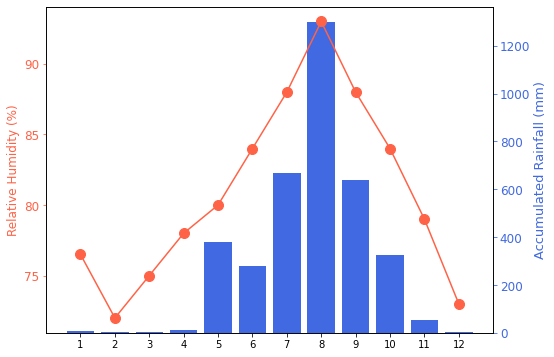

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

ax.plot(np.arange(1,13),monthly_rh_med,color='tomato',marker='o',markersize=10,zorder=2)
ax2.bar(np.arange(1,13),monthly_precip_sum,color='royalblue',zorder=1)
ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

ax.set_ylabel('Relative Humidity (%)',fontsize=12,color='tomato')
ax2.set_ylabel('Accumulated Rainfall (mm)',fontsize=13,color='royalblue')

ax.tick_params(axis='y', colors='tomato',labelsize=12)
ax2.tick_params(axis='y', colors='royalblue',labelsize=12)

plt.xticks(np.arange(1,13),np.arange(1,13))
plt.show()

From here, we see that the relative humidity more or less has a direct relationship with the accumulated rainfall, except in January when the relative humidity suddenly increased.

## Windrose plot of Laoag City synoptic station

In [21]:
#get wind direction and speed
station_dir = wind_dir['Laoag City, Ilocos Norte Wind.Dir [deg.]'][1:]
station_spd = wind_spd['Laoag City, Ilocos Norte Wind.Speed [m/s]'][1:]

In [22]:
#uncomment the next line to install the windrose package
#!pip install windrose openpyxl
from windrose import WindroseAxes

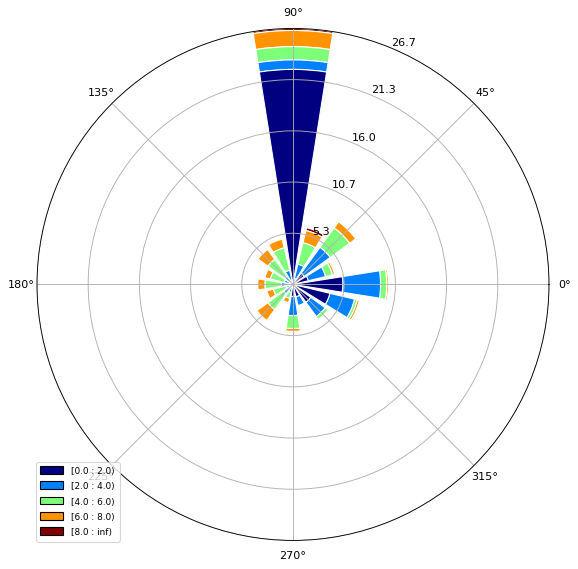

In [37]:
ax = WindroseAxes.from_ax()
ax.bar(station_dir, station_spd, normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 10, 2))
ax.set_legend()

plt.show()

In this windrose plot, the polar coordinates of each spoke correspond to the wind direction, the colormap corresponds to the wind speed, and the radius of each spoke corresponds to the frequency distribution of the wind velocities. For example, wind speeds between 0m/s to 2m/s most commonly come from the north. A few extreme wind speeds (8m/s and above) denoted by the dark red bars originate mostly from the north to northeast direction. 

## Daily median relative humidity, temperature, and pressure

In [33]:
daily_pres_med = []
daily_rh_med = []
daily_temp_med = []

#calculate the overall median for each day
for d in dates:
    day = d[5:]
    pres_index = pressure['Date(UTC)'].str.contains(day)
    pres_vals = pressure[pres_index].filter(like='Laoag City',axis=1)
    
    rh_index = rel_hum['Date(UTC)'].str.contains(day)
    rh_vals = rel_hum[rh_index].filter(like='Laoag City',axis=1)
    
    temp_index = temp['Date(UTC)'].str.contains(day)
    temp_vals = temp[temp_index].filter(like='Laoag City',axis=1)
    
    daily_pres_med.append(pres_vals.median()[0])
    daily_rh_med.append(rh_vals.median()[0])
    daily_temp_med.append(temp_vals.median()[0])

#get rolling median pressure every 10 days
med_pres = pd.Series(daily_pres_med)
rolling_med_pres = med_pres.rolling(10).median()

#get rolling median RH every 10 days
med_rh = pd.Series(daily_rh_med)
rolling_med_rh = med_rh.rolling(10).median()

#get rolling median temp every 10 days
med_temp = pd.Series(daily_temp_med)
rolling_med_temp = med_temp.rolling(10).median()

C:\Users\Mic Mic\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In case a RuntimeWarning appears, this just means that the code encountered NaN values or missing data. The missing data should reflect in the next plots as gaps.

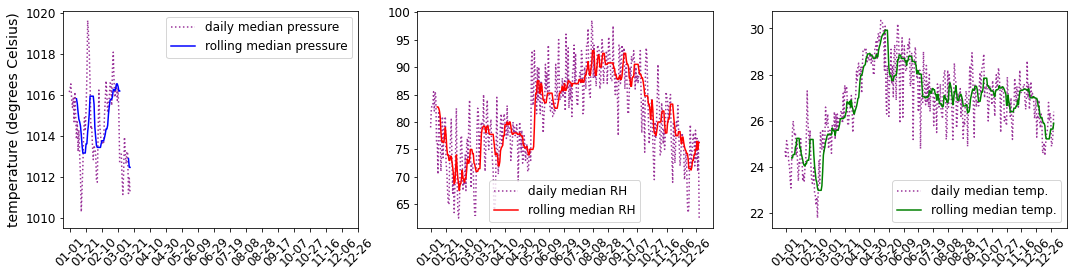

In [35]:
plt.figure(figsize=(18,4))

#plot pressure
plt.subplot(131)
plt.plot(days,daily_pres_med,color='purple',linestyle='dotted',alpha=0.8,label='daily median pressure')
plt.plot(days,rolling_med_pres,color='blue',label='rolling median pressure')
plt.xticks(np.arange(1,367,20),days[::20],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('temperature (degrees Celsius)',fontsize=14)
plt.legend(loc='best',fontsize=12)

#plot relative humidity
plt.subplot(132)
plt.plot(days,daily_rh_med,color='purple',linestyle='dotted',alpha=0.8,label='daily median RH')
plt.plot(days,rolling_med_rh,color='red',label='rolling median RH')
plt.xticks(np.arange(1,367,20),days[::20],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)

#plot temp
plt.subplot(133)
plt.plot(days,daily_temp_med,color='purple',linestyle='dotted',alpha=0.8,label='daily median temp.')
plt.plot(days,rolling_med_temp,color='green',label='rolling median temp.')
plt.xticks(np.arange(1,367,20),days[::20],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)

plt.show()

The pressure measurements in Laoag City were available only during the start of the year, so the rest of the year contained missing data. In fact, a lot of the stations had huge gaps in their pressure measurements. 

The daily relative humidity and temperature follows the underlying trend from the previous plots. I was hoping to compare the trends of pressure and relative humidity to the accumulated rainfall, but the missing data is proving to be difficult to perform analyses. 

## Diurnal cycle of synoptic measurements in Laoag City

In [38]:
hourly_temp = []
hourly_rh = []
hourly_pres = []
hourly_wind = []

#calculte the overall median for each time
for t in range(0,22,3):
    time = str(t)+':00:00'
    index = temp['Date(UTC)'].str.contains(time)
    
    pres_index = pressure['Date(UTC)'].str.contains(time)
    pres_vals = pressure[pres_index].filter(like='Laoag City',axis=1)
    
    rh_index = rel_hum['Date(UTC)'].str.contains(time)
    rh_vals = rel_hum[rh_index].filter(like='Laoag City',axis=1)
    
    temp_index = temp['Date(UTC)'].str.contains(time)
    temp_vals = temp[temp_index].filter(like='Laoag City',axis=1)
    
    wind_index = wind_spd['Date(UTC)'].str.contains(time)
    wind_vals = wind_spd[wind_index].filter(like='Laoag City',axis=1)
    
    hourly_pres.append(pres_vals.median()[0])
    hourly_rh.append(rh_vals.median()[0])
    hourly_temp.append(temp_vals.median()[0])
    hourly_wind.append(wind_vals.median()[0])

### Temperature and Relative Humidity

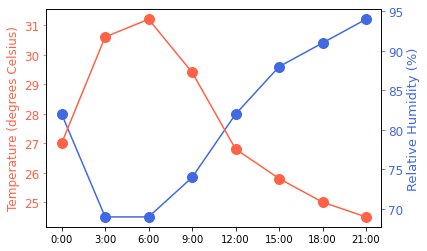

In [55]:
fig,ax = plt.subplots(figsize=(6,4))
ax2 = ax.twinx()

ax.plot(times,hourly_temp,color='tomato',marker='o',markersize=10,zorder=2)
ax2.plot(times,hourly_rh,color='royalblue',marker='o',markersize=10,zorder=1)
ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

ax.set_ylabel('Temperature (degrees Celsius)',fontsize=12,color='tomato')
ax2.set_ylabel('Relative Humidity (%)',fontsize=13,color='royalblue')

ax.tick_params(axis='y', colors='tomato',labelsize=12)
ax2.tick_params(axis='y', colors='royalblue',labelsize=12)

plt.xticks(np.arange(8),times)

plt.show()

### Pressure and Wind

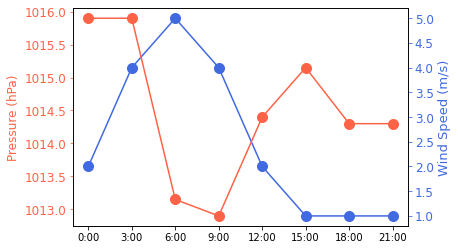

In [57]:
fig,ax = plt.subplots(figsize=(6,4))
ax2 = ax.twinx()

ax.plot(times,hourly_pres,color='tomato',marker='o',markersize=10,zorder=2)
ax2.plot(times,hourly_wind,color='royalblue',marker='o',markersize=10,zorder=1)
ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

ax.set_ylabel('Pressure (hPa)',fontsize=12,color='tomato')
ax2.set_ylabel('Wind Speed (m/s)',fontsize=13,color='royalblue')

ax.tick_params(axis='y', colors='tomato',labelsize=12)
ax2.tick_params(axis='y', colors='royalblue',labelsize=12)

plt.xticks(np.arange(8),times)

plt.show()

Based on their diurnal cycle, the wind speed and temperature have a direct relationship, while temperature and relative humidity have an indirect relationship. Temperatures and wind speeds are higher during the mornings, and then slowly decreases as the day progresses into noon, the afternoon, and the evenings. The opposite is true for relative humidity. The diurnal behavior of pressure is a little erratic, dropping late morning and then peaking during mid-afternoon and early morning. 